# ML: Supervised algorithm - Naive Bayes - Diabetes Diagnosis

## Introduction

Let's train a classification model to determine whether or not a person suffers from diabetes.

The predictor or independent variables are:

* pregnant: number of times patient has been pregnant. 
* glucose: plasma glucose concentration at two hours in an oral glucose tolerance test.
* bp: average blood pressure.
* skin: triceps skinfold thickness (mm).
* insulin: 2-hour serum insulin (mu U/ml).
* bmi: body mass index
* pedigree: pedigree function of diabetes.
* age: age of the patient.

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

As you can see, in this case we will load the GaussianNB library, which is in charge of loading the naïve Bayes models with continuous numerical predictive variables. 

## 2. Load datasets

In [4]:
col_names = ['pregnant', 'glucose', 'bp',
             'skin', 'insulin', 'bmi',
             'pedigree', 'age', 'label']

diabetes = pd.read_csv("diabetes.csv", header=0, names = col_names)

In [5]:
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Dataset analysis

In this step, we will do a basic scan of the loaded dataset. As you can see, we do not have any categorical predictor variables. So, as previously mentioned, we can make use of the Gaussian Naïve Bayes method.  

In [6]:
diabetes.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


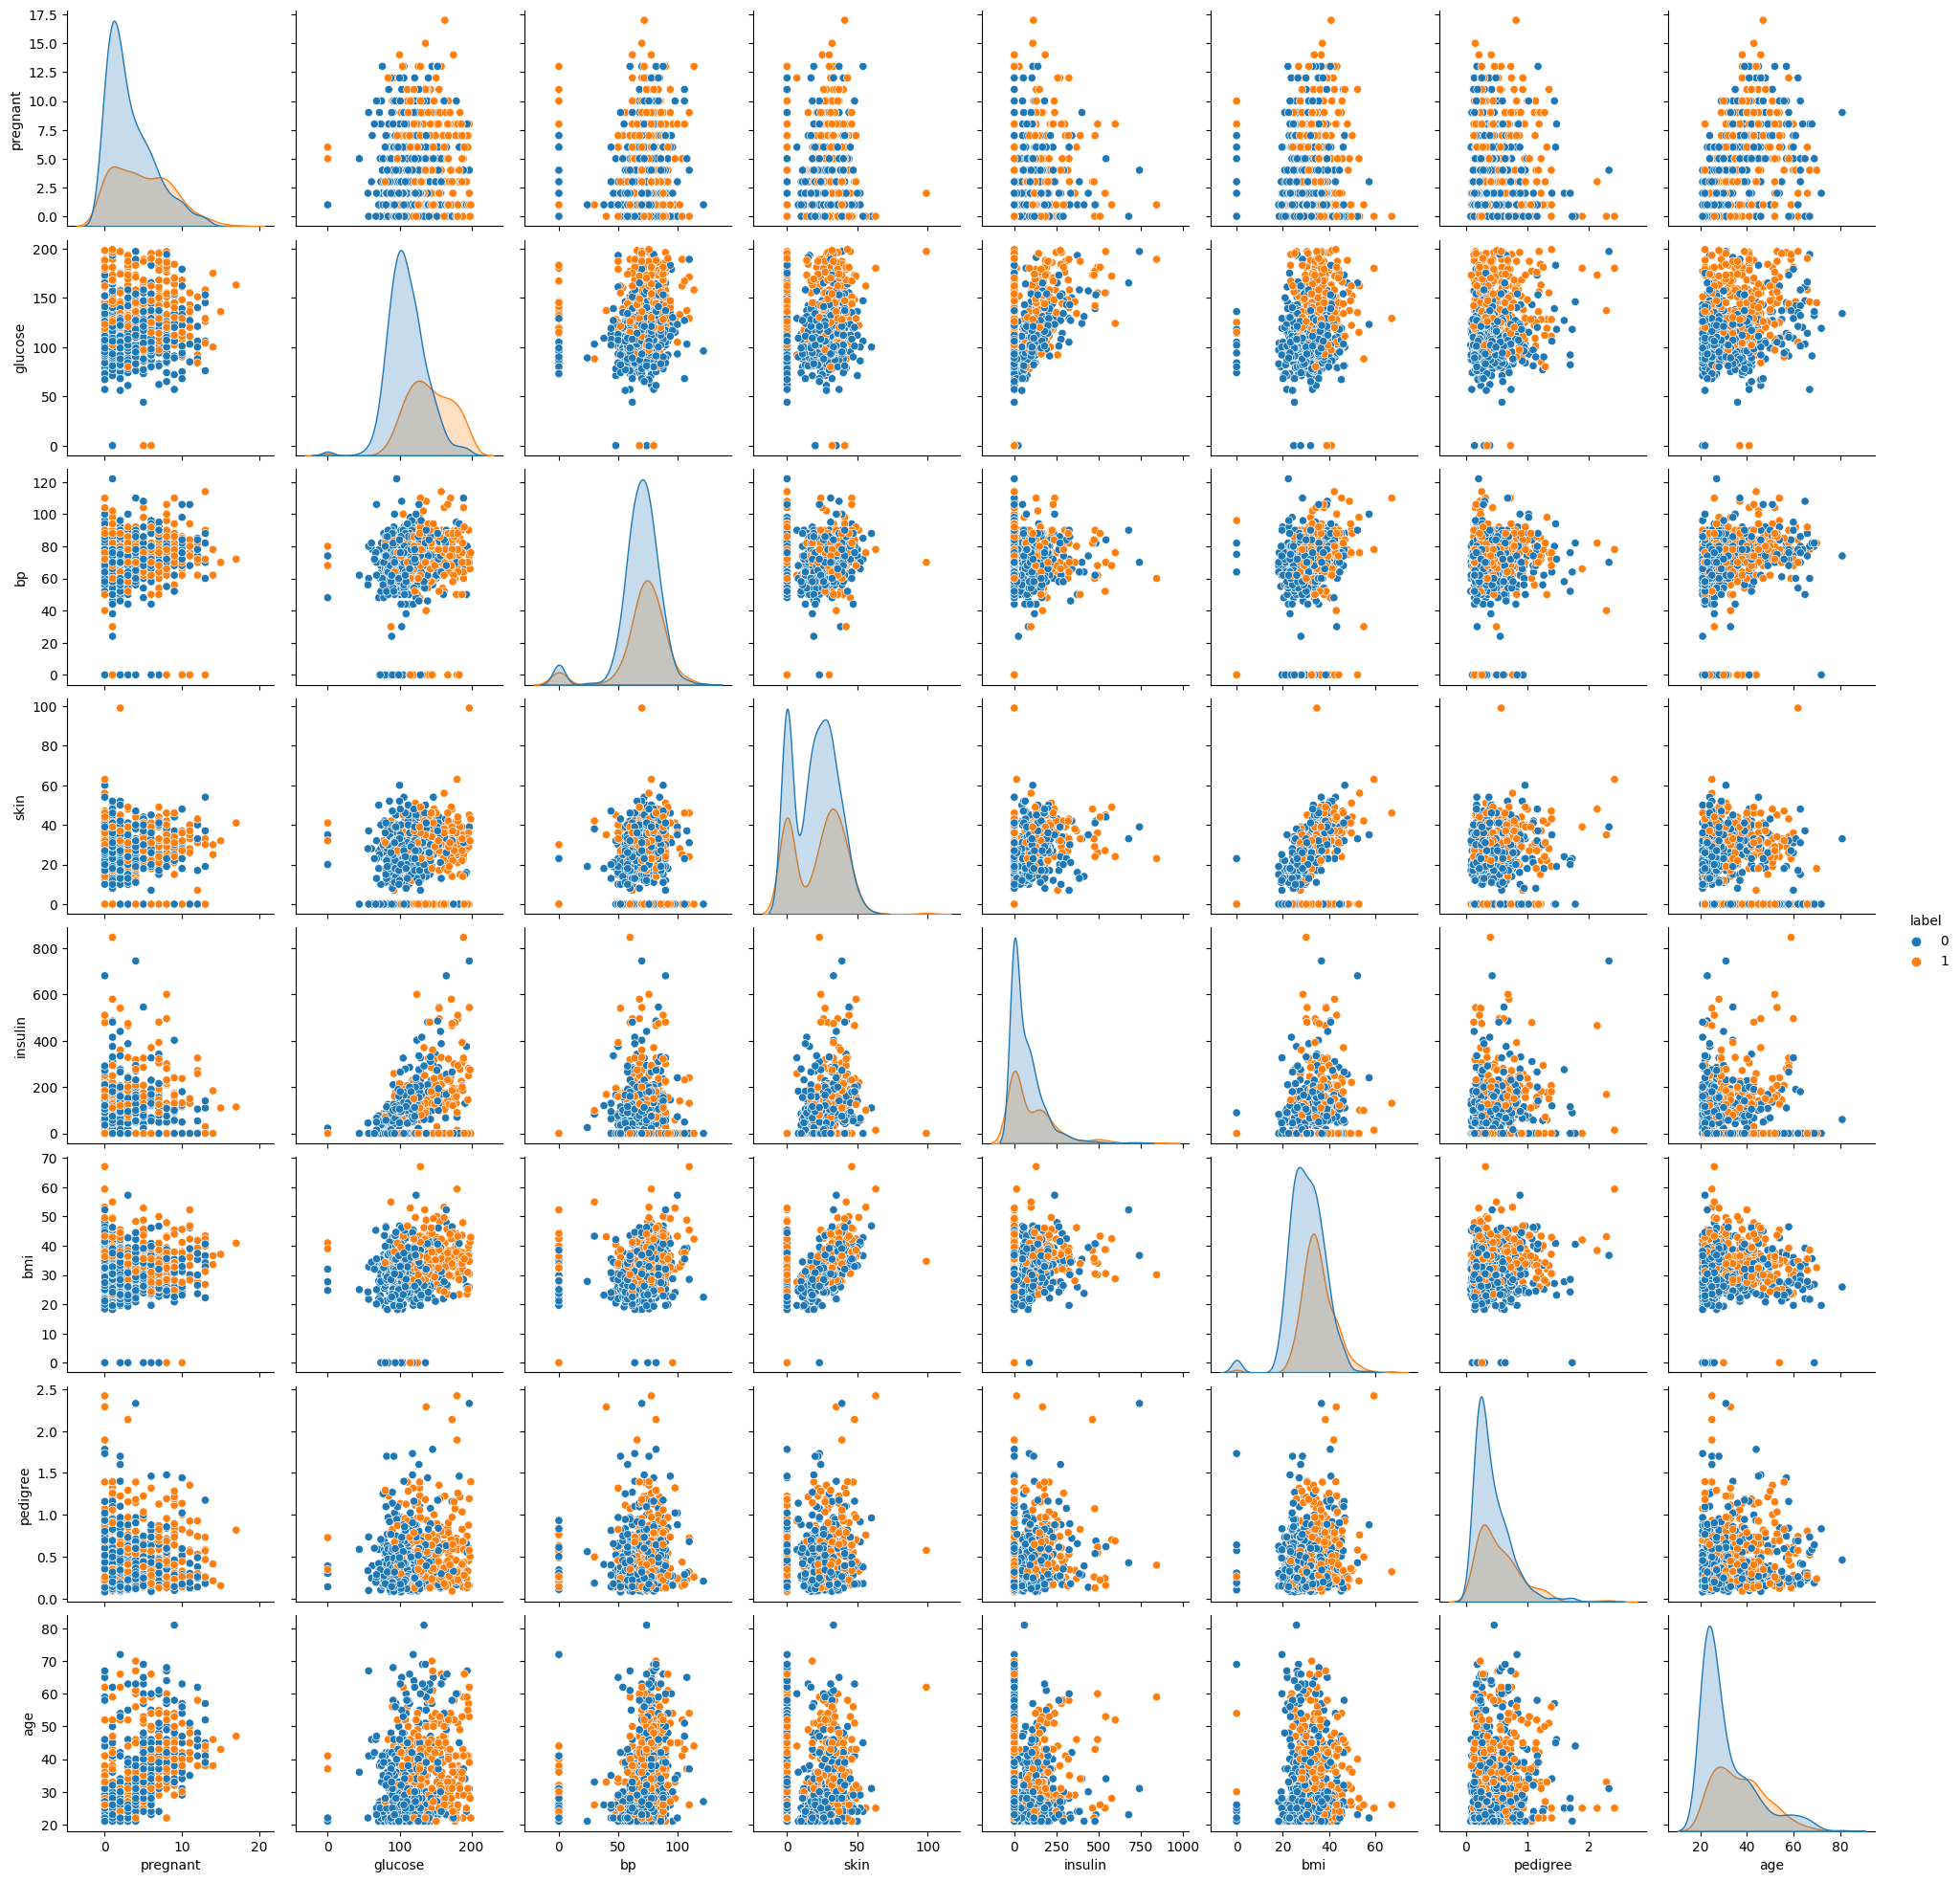

In [7]:
sns.pairplot(diabetes, hue = 'label')

Regarding the exploratory analysis of the dataset, one of the graphs that provides us with more information of the data is using seaborn pairplot() command. 
 
Get focus mainly on the figures on the diagonal. In them we can observe the distribution of the data for each of the classes. For any classification problem, and in particular for Naïve Bayes models, we expect these distributions to be visually distinct.  For example, glucose variable we find that the population mean is different when label = 0 and label = 1. Having higher glucose for patients with diabetes (label = 1). That makes sense from a medical point of view.

In [8]:
diabetes.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

## 4. Train model

In [9]:
X = diabetes.drop('label', axis=1)
y = diabetes.label

In [10]:
X.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [12]:
# Initialising the model using the default parameters 
nb_model = GaussianNB(var_smoothing = 1e-9)

# Fitting the model to the data
nb_model.fit(X_train, y_train)

GaussianNB()

Define the model with default parameters, you can verify in the sklearn documentation that this model does not have many parameters. This is one of the great advantages when setting up a Naïve Bayes model.

In [13]:
# Predict
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred, normalize=True))

Precisión del modelo: 0.7575757575757576


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       147
           1       0.72      0.55      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



It's not a really good model for prediction (recall for label positive diabetes=1  55%), but is a good example of use.